In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv("Accidents2018to2025.csv")
data = df.head()
display(data)

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Collision Type Description,Weather Description,Illumination Description,...,HarmfulDescriptions,ObjectId,Zip Code,RPA,Weather,IlluACCIDEmination,Collision Type,Reporting Officer,x,y
0,2008473471,7/14/2018 11:00:00 PM,2.0,2.0,0.0,NaN,N,ANGLE,NO ADVERSE CONDITIONS,NaN,...,NaN,1,37208.0,4525.0,1.0,1.0,4.0,225845.0,-9.664843e+06,4.323742e+06
1,2008787228,11/16/2018 9:33:00 AM,1.0,1.0,0.0,NaN,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,NO ADVERSE CONDITIONS,NaN,...,NaN,2,37203.0,5401.0,1.0,3.0,0.0,475881.0,-9.662645e+06,4.322558e+06
2,2009131786,2/19/2019 10:42:00 PM,1.0,1.0,0.0,NaN,N,HEAD-ON,NO ADVERSE CONDITIONS,NaN,...,NaN,3,37218.0,3235.0,1.0,1.0,2.0,562528.0,-9.674832e+06,4.329570e+06
3,2009418107,5/27/2019 9:00:00 PM,2.0,0.0,0.0,NaN,Y,REAR END,NO ADVERSE CONDITIONS,NaN,...,NaN,4,NaN,4311.0,1.0,1.0,1.0,571315.0,-9.659749e+06,4.323487e+06
4,20120135824,3/8/2021 6:05:00 PM,2.0,1.0,0.0,NaN,N,Front to Rear,CLEAR,DAYLIGHT,...,MOTOR VEHICLE IN TRANSPORT,5,37207.0,1863.0,21.0,1.0,11.0,473670.0,-9.659079e+06,4.328993e+06


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216117 entries, 0 to 216116
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident Number             216117 non-null  int64  
 1   Date and Time               216117 non-null  object 
 2   Number of Motor Vehicles    216113 non-null  float64
 3   Number of Injuries          216114 non-null  float64
 4   Number of Fatalities        216114 non-null  float64
 5   Property Damage             17640 non-null   object 
 6   Hit and Run                 216103 non-null  object 
 7   Collision Type Description  203143 non-null  object 
 8   Weather Description         194653 non-null  object 
 9   Illumination Description    202657 non-null  object 
 10  Street Address              215881 non-null  object 
 11  City                        216113 non-null  object 
 12  State                       216113 non-null  object 
 13  Precinct      

In [9]:
df.isnull().sum()

Accident Number                    0
Date and Time                      0
Number of Motor Vehicles           4
Number of Injuries                 3
Number of Fatalities               3
Property Damage               198477
Hit and Run                       14
Collision Type Description     12974
Weather Description            21464
Illumination Description       13460
Street Address                   236
City                               4
State                              4
Precinct                         110
Lat                                2
Long                               2
HarmfulCodes                   19245
HarmfulDescriptions            21435
ObjectId                           0
Zip Code                         143
RPA                              105
Weather                        21464
IlluACCIDEmination             13456
Collision Type                 12974
Reporting Officer                 15
x                                  2
y                                  2
d

In [15]:
df.dropna(inplace=True)
df.isnull().sum()

Accident Number               0
Date and Time                 0
Number of Motor Vehicles      0
Number of Injuries            0
Number of Fatalities          0
Property Damage               0
Hit and Run                   0
Collision Type Description    0
Weather Description           0
Illumination Description      0
Street Address                0
City                          0
State                         0
Precinct                      0
Lat                           0
Long                          0
HarmfulCodes                  0
HarmfulDescriptions           0
ObjectId                      0
Zip Code                      0
RPA                           0
Weather                       0
IlluACCIDEmination            0
Collision Type                0
Reporting Officer             0
x                             0
y                             0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15675 entries, 10 to 216111
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Accident Number             15675 non-null  int64         
 1   Date and Time               15675 non-null  datetime64[ns]
 2   Number of Motor Vehicles    15675 non-null  float64       
 3   Number of Injuries          15675 non-null  float64       
 4   Number of Fatalities        15675 non-null  float64       
 5   Property Damage             15675 non-null  object        
 6   Hit and Run                 15675 non-null  object        
 7   Collision Type Description  15675 non-null  object        
 8   Weather Description         15675 non-null  object        
 9   Illumination Description    15675 non-null  object        
 10  Street Address              15675 non-null  object        
 11  City                        15675 non-null  object       

In [ ]:
df['Date and Time'] = pd.to_datetime(df['Date and Time'], format='mixed')

In [24]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [26]:
df.describe()

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Lat,Long,ObjectId,Zip Code,RPA,Weather,IlluACCIDEmination,Collision Type,Reporting Officer,x,y
count,1.567500e+04,15675,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,15675.000000,1.567500e+04,1.567500e+04,1.567500e+04
mean,2.021027e+10,2021-06-18 10:55:57.929186816,1.123700,0.431834,0.006571,36.147917,-86.749507,111356.395853,37170.609952,9123.991515,21.117767,2.341116,1.842360,1.279529e+06,-9.656911e+06,4.320998e+06
min,2.017000e+10,2018-01-01 06:00:00,0.000000,0.000000,0.000000,35.974490,-87.044860,11.000000,37013.000000,1001.000000,2.000000,1.000000,0.000000,1.010640e+05,-9.689789e+06,4.297112e+06
25%,2.019062e+10,2019-08-21 05:49:30,1.000000,0.000000,0.000000,36.083425,-86.796950,60574.500000,37135.000000,3213.000000,21.000000,1.000000,0.000000,2.564460e+05,-9.662192e+06,4.312107e+06
50%,2.021036e+10,2021-07-03 05:00:00,1.000000,0.000000,0.000000,36.149590,-86.747360,115964.000000,37207.000000,6733.000000,21.000000,2.000000,0.000000,3.844030e+05,-9.656672e+06,4.321224e+06
75%,2.023016e+10,2023-03-17 06:12:30,1.000000,1.000000,0.000000,36.197210,-86.694615,161489.000000,37211.000000,8855.000000,21.000000,3.000000,0.000000,4.000686e+06,-9.650800e+06,4.327791e+06
max,2.025021e+10,2025-04-05 19:30:00,10.000000,8.000000,3.000000,36.399070,-86.518200,216112.000000,37240.000000,95100.000000,99.000000,98.000000,98.000000,4.018548e+06,-9.631162e+06,4.355673e+06
std,2.060426e+07,NaN,0.747637,0.752433,0.089774,0.074094,0.084129,60635.976713,70.930968,14667.318340,16.912577,4.064626,7.826299,1.596325e+06,9.365181e+03,1.021593e+04


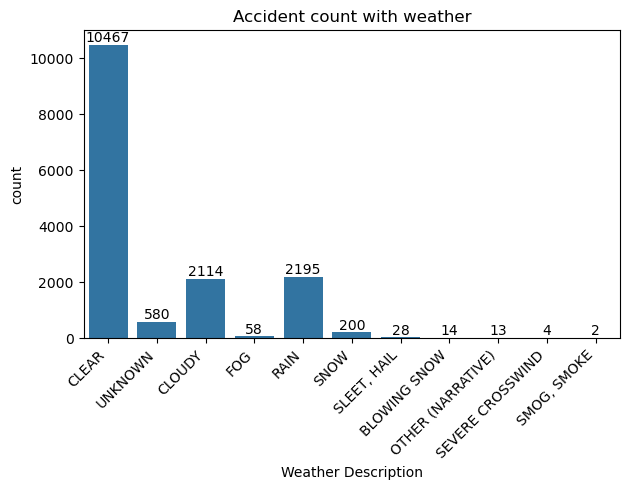

In [49]:
my_graph = sns.countplot(x='Weather Description',data=df)
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align to the right
plt.tight_layout() # Adjust layout to prevent labels from being cut off
my_graph.bar_label(my_graph.containers[0])
plt.title('Accident count with weather')
plt.show()

                     Weather Description
Weather Description                     
BLOWING SNOW                          14
CLEAR                              10467
CLOUDY                              2114
FOG                                   58
OTHER (NARRATIVE)                     13
RAIN                                2195
SEVERE CROSSWIND                       4
SLEET, HAIL                           28
SMOG, SMOKE                            2
SNOW                                 200
UNKNOWN                              580


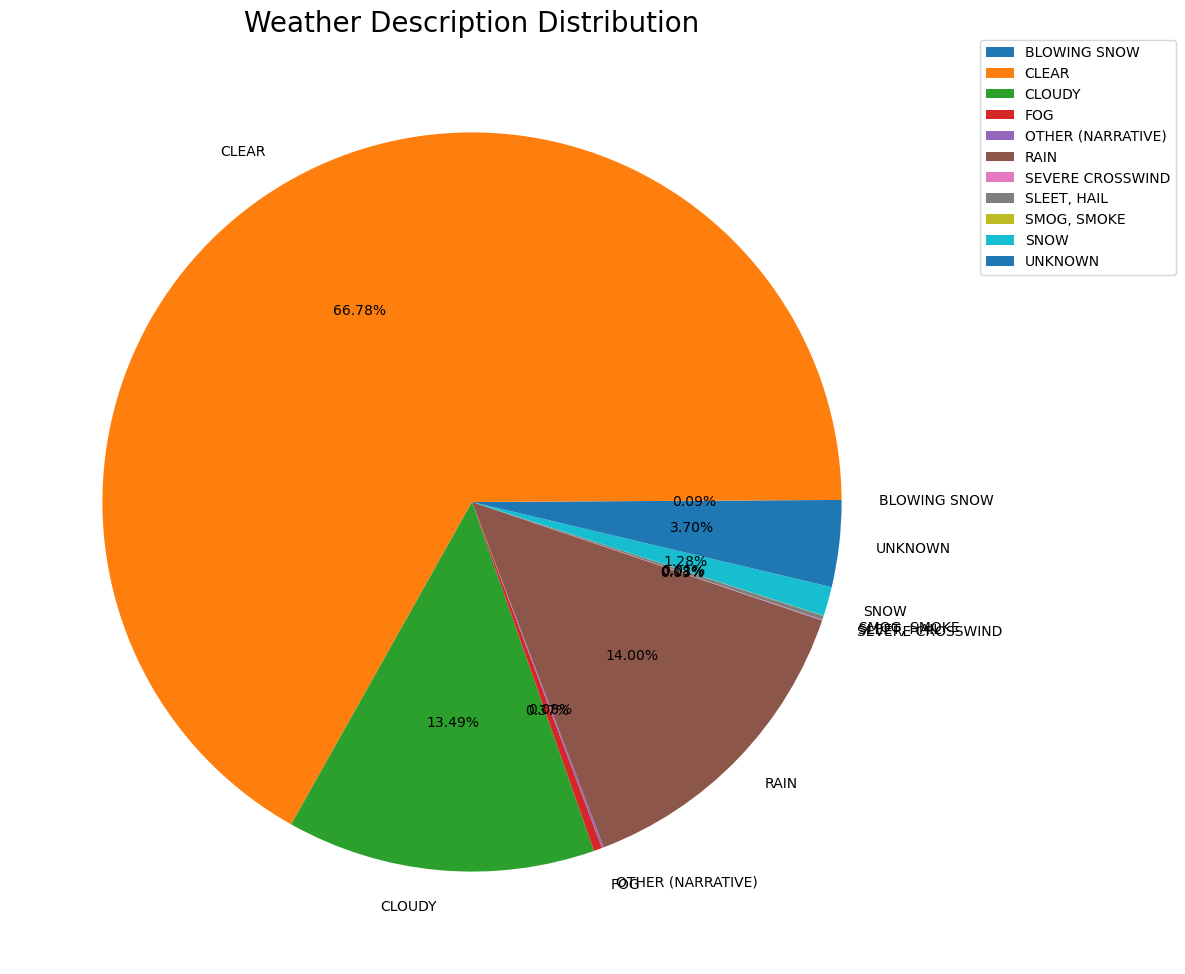

In [56]:
my_groupby = df.groupby('Weather Description').agg({'Weather Description':'count'})
print(my_groupby)
my_labels = my_groupby.index
plt.figure(figsize=(12,12))
plt.pie(my_groupby['Weather Description'], labels = my_labels, autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# bbox_to_anchor method to explicitly place the legend outside the pie chart area. 
plt.title('Weather Description Distribution',fontsize= 20)
plt.show()